# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
pd.options.mode.chained_assignment = None

from pymystem3 import Mystem
m = Mystem()

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Построим общую гистограммы для всех числовых столбцов таблицы.

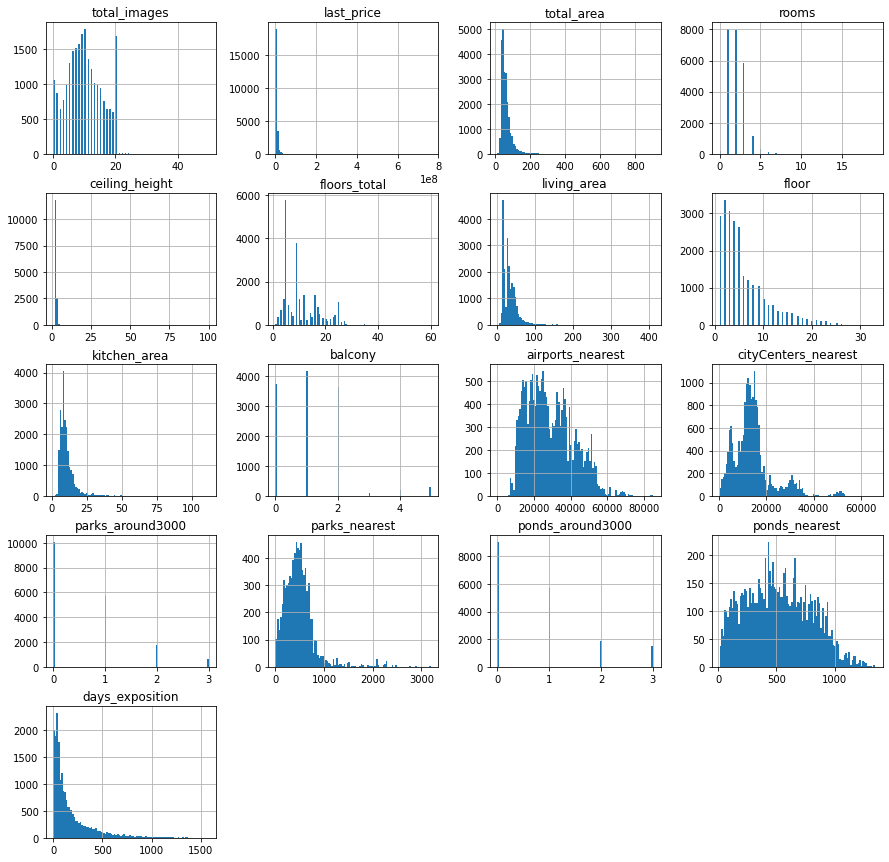

In [7]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=100, figsize=(15, 15));

### Предобработка данных

#### Анализ пропусков

##### Смотрим, где есть пропуски.

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Замена пропусков в столбце с высотой потолков. Заменим их на медиану высоты потолков.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

##### Замена пропусков в столбце с апартаментами. Вероятне всего, если не указали, что объект это апартамент, то это жилая квартира. Заменим эти значения на False.

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

##### Аналогично поступим со столбцом количества балконов.

In [11]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

##### Разберем столбец с расстоянием до ближайшего аэропорта.

In [635]:
df[df.airports_nearest.isna()][ 'locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Видно, что в основном это информация не укзана в обьявлениях за пределами города. Оставим как есть.

##### Разберем столбец с расстоянием до центра города.

In [12]:
df[df.cityCenters_nearest.isna()][ 'locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Ивангород', 'Каменногорск', 'Кингисепп',
       'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село',
       'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сланцы',
       'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской по

Аналогичная ситуация.

##### Посмотрим на количество парков в радиусе 3 км.

In [13]:
df.parks_around3000.unique()

array([ 1.,  0.,  2., nan,  3.])

Если не указали количество парков в радиусе 3 км., то  очень вероятно, что их нет. Заменим на 0.

In [14]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

##### Посмотрим на растояние до ближайшего парка. Если в столбце с количеством парков стоит 0, а в столбце с расстоянием Na, то их можно заменить на 0, так как парка нет, то и расстояния нет) 

In [15]:
df[df.parks_nearest.isna()]['parks_around3000'].unique()

array([0.])

Заменяем. 

In [16]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['parks_nearest'].isna().sum()

0

##### Аналогично поступим со столбцами с количеством водоемов и расстонием до ближайшего водоема.

In [17]:
df.ponds_around3000.unique()

array([ 2.,  0.,  3.,  1., nan])

In [18]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

Проверим гипотезу.

In [19]:
df[df.ponds_nearest.isna()]['ponds_around3000'].unique()

array([0.])

Смело заполняем нулями.

In [20]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['ponds_nearest'].isna().sum()

0

##### Заполним пропуски в столбце living_area отношением общей площади к отношению медиан общей и жилой площадей. 

In [21]:
df['living_area'] = df['living_area'].fillna(df['total_area'] / (df['total_area'].median() / df['living_area'].median()))
df['living_area'].isna().sum()

0

##### Заполним пропуски в столбце kitchen_area отношением общей площади к отношению медиан общей площади и  площади кухни. 

In [22]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / (df['total_area'].median() / df['kitchen_area'].median()))
df['kitchen_area'].isna().sum()

0

In [23]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

#### Анализ типов данных

In [24]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

##### Преобразуем значения в столбце first_day_exposition в datetime

In [25]:
df['first_day_exposition'] = pd.to_datetime(df.first_day_exposition)
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

##### Преобразуем значения в столбце is_apartment в bool

In [26]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'].dtypes

dtype('bool')

##### Преобразуем значения в столбце balcony в int, так как количество балконов может принимать только целое значение.

In [27]:
df['balcony'] = df['balcony'].astype('int64')
df['balcony'].dtypes

dtype('int64')

##### Преобразуем значения в столбце parks_around3000 в int, так как количество парков может принимать только целое значение.

In [28]:
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['parks_around3000'].dtypes

dtype('int64')

##### Преобразуем значения в столбце ponds_around3000 в int, так как количество водоемов может принимать только целое значение.

In [29]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')
df['ponds_around3000'].dtypes

dtype('int64')

In [30]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Анализ аномальных значений и неявных дубликатов

In [31]:
for column in df.columns:
    print(column)
    print(df[column].sort_values().unique())
    print('')

total_images
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]

last_price
[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]

total_area
[ 12.   13.   13.2 ... 631.  631.2 900. ]

first_day_exposition
['2014-11-27T00:00:00.000000000' '2014-11-29T00:00:00.000000000'
 '2014-12-04T00:00:00.000000000' ... '2019-05-01T00:00:00.000000000'
 '2019-05-02T00:00:00.000000000' '2019-05-03T00:00:00.000000000']

rooms
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]

ceiling_height
[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97

##### В столбце ceiling_height есть занчения с потолком ниже 2,4 м. По нормам это недопустимо.

In [32]:
len(df.query('ceiling_height < 2.4'))

21

Всего 21 объявление с такой высотой потолков. Удалим их.

In [33]:
df = df[df['ceiling_height'] > 2.4]
len(df.query('ceiling_height < 2.4'))

0

В этом же столбце есть значение больше 24, это ошибка заменим их на значения в десять раз меньше.

In [34]:
len(df.query('ceiling_height > 24'))

20

In [35]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 24.0, df['ceiling_height'] / 10)
len(df.query('ceiling_height > 24'))

0

##### В столбце floors_total есть значения с количеством этажей больше 37. В Санкт-Петербурге самое высокое  жилое здание в жилом комплексе «Князь Александр Невский» имеет 37 этажей. Выше него только бц "Лидер Тауэр" и Лахта центр, но в первом нет жилых помещений, а второй еще не достроен.

In [36]:
len(df.query('floors_total > 37'))

2

Всего 2 таких объявления. Удалим их.

In [37]:
df = df[df['floors_total'] <= 37]
len(df.query('floors_total > 37'))

0

##### После этих манипуляций не осталось пропусков в столбце floors_total, можно смело преобразовать значения в этом столбце в int.

In [38]:
df['floors_total'].isna().sum() 

0

In [39]:
df['floors_total'] = df['floors_total'].astype('int64')
df['floors_total'].dtypes

dtype('int64')

##### В столбце с жилой площадью есть квартиры со значением меньше 9 кв. м. Это запрещено жилищным кодексом

In [40]:
len(df.query('living_area < 9'))

19

Всего 14 таких квартир. Удалим их.

In [665]:
df = df[df['living_area'] >= 9]
len(df.query('living_area < 9'))

0

##### В столбце с общей площадью есть квартиры со значением меньше 13,65 кв. м. Это запрещено жилищным кодексом

In [666]:
len(df.query('total_area < 13.65'))

2

Всего 2 такие квартиры. Удалим их.

In [667]:
df = df[df['total_area'] >= 13.65]
len(df.query('total_area < 13.65'))

0

##### Очень много нулевых значений в столбце и с количеством парков и расстоянием до ближайшего парка. Нет парка - нет расстояния. 

In [43]:
len(df.query('parks_nearest == 0 and parks_around3000 == 0'))

15538

#####  Взглянем на всякий случай на информацию о водоемах. 

In [44]:
df.query('ponds_nearest == 0 and ponds_around3000 == 0').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13575,10,"3,900,000.0",60.0,2018-08-01,2,2.6,5,34.6,4,False,...,10.5,0,Выборг,NaN,NaN,0,0.0,0,0.0,45.0
12656,7,"4,500,000.0",37.7,2019-04-22,1,2.6,26,14.2,1,False,...,10.8,0,посёлок Парголово,"53,179.0","19,356.0",0,0.0,0,0.0,NaN
9303,8,"1,090,000.0",31.0,2018-06-18,1,2.6,5,17.9,4,False,...,5.4,0,деревня Старые Бегуницы,NaN,NaN,0,0.0,0,0.0,45.0
2675,0,"3,900,000.0",39.1,2017-12-13,1,2.6,5,17.8,4,False,...,8.6,1,Пушкин,"14,135.0","26,288.0",0,0.0,0,0.0,331.0
18848,6,"28,500,000.0",270.0,2015-03-02,16,3.0,4,180.0,4,False,...,13.0,1,Санкт-Петербург,"23,575.0","4,142.0",1,516.0,0,0.0,"1,365.0"


Та же ситуация. В дальнейшем стоит учесть, что если в столбце с расстоянием до парка/водоема стоит 0, то это означает отсутствие парка/водоема в радиусе 3 км. 

##### В столбце с  количеством комнат есть значения 0. Вероятнее всего это студии. В строительных нормах и правилах Российской Федерации определение квартиры-студии не закреплено, и чаще всего их определяют как однокомнатную квартиру свободной планировки. Можно заменить эти значения на 1, но я бы оставил как 0 чтобы не терять информацию по таким квартирам, а в дальнейшем анализе учитывал бы этот момент.

Но есть такие квартиры, которые не студии, но с количеством комнат 0. Это явно ошибка. Таких квартир 55 штук. Удалим их.

In [45]:
len(df.query('studio == False and rooms == 0'))

59

In [46]:
df = df.query('not(studio == False and rooms == 0)')
len(df.query('studio == False and rooms == 0'))

0

#### Удалим неявные дубликаты в столбце с названием населеного пункта

##### Первым делом заменим все 'посёлок' на 'поселок'

In [47]:
df.locality_name = df[df['locality_name'].notna()].locality_name.apply(lambda x: x.replace('посёлок', 'поселок'))
len(df.locality_name.unique())

330

##### Далее заменим 'поселок городского типа', 'коттеджный поселок' и 'городской поселок' на 'поселок'

In [48]:
df.locality_name = df[df['locality_name'].notna()].locality_name.apply(lambda x: x.replace('поселок городского типа', 'поселок'))
df.locality_name = df[df['locality_name'].notna()].locality_name.apply(lambda x: x.replace('городской поселок', 'поселок'))
df.locality_name = df[df['locality_name'].notna()].locality_name.apply(lambda x: x.replace('коттеджный посёлок', 'поселок'))
len(df.locality_name.unique())

322

### Посчитаем и добавим в таблицу новые столбцы

#### Добавим столбец с ценой одного квадратного метра

In [49]:
df['one_square_price'] = df['last_price'] / df['total_area']

#### Добавим столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [50]:
df['day_of_publication'] = df['first_day_exposition'].dt.weekday

#### Добавим столбец c месяцем публикации объявления

In [51]:
df['month_of_publication'] = df['first_day_exposition'].dt.month

#### Добавим столбец c годом публикации объявления

In [52]:
df['year_of_publication'] = df['first_day_exposition'].dt.year

#### Добавим столбец с типом этажа квартиры (значения — «‎первый», «последний», «другой»)

In [54]:
def type_of_flat(floor, floors_total):
    '''
    Функция для сравнения значений в столбцах floor и floors_total. 
    Если значение в floor равно 1, то функция возвращает 'первый'. 
    Если значение в столбце 'первый' и 'floors_total' равны, то возвращает 'последний'. 
    В ином случае возвращает 'другой'.
    '''
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        return 'неверные входные данные' 

In [55]:
df['type_of_flat'] = df.apply(lambda x: type_of_flat(x['floor'], x['floors_total']), axis=1)

#### Добавим столбец с расстоянием до центра города в километрах

In [56]:
df['cityCenters_nearest_in_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_in_km'] = df[df['cityCenters_nearest_in_km'].notna()].cityCenters_nearest_in_km.apply(lambda x: round(x))

Проверим  добавленные столбцы

In [58]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_price,day_of_publication,month_of_publication,year_of_publication,type_of_flat,cityCenters_nearest_in_km
20718,3,"1,950,000.0",36.0,2018-11-12,1,2.6,5,18.0,3,False,...,0.0,0,0.0,54.0,"54,166.7",0,11,2018,другой,NaN
23684,20,"21,400,000.0",145.0,2018-11-02,4,3.0,26,71.4,17,False,...,0.0,0,0.0,NaN,"147,586.2",4,11,2018,другой,11.0
20253,19,"9,250,000.0",75.0,2019-01-11,3,3.0,3,52.6,3,False,...,160.0,3,90.0,18.0,"123,333.3",4,1,2019,последний,30.0
27,20,"7,100,000.0",70.0,2017-05-12,3,2.6,17,49.0,11,False,...,452.0,1,779.0,151.0,"101,428.6",4,5,2017,другой,11.0
5700,10,"5,100,000.0",66.0,2018-12-18,3,2.5,9,47.0,1,False,...,0.0,0,0.0,84.0,"77,272.7",1,12,2018,первый,15.0


### Исследовательский анализ данных

#### Изучим следующие параметры объектов: 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

In [59]:
def row_analyze(column, bins_count=100):
    '''
    Функция для вывоа статистической информации по передаваемому столбцу и вывода гистограммы распределения. 
    В качестве передаваемых аргументов выступает столбец датафрейма и количество корзин для построения гистограммы.
    '''
    min_range = column.min()
    max_range = column.max()
    print(column.describe())
    column.hist(bins=bins_count, range=(min_range, max_range))

count   23,508.0
mean        60.4
std         35.6
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64


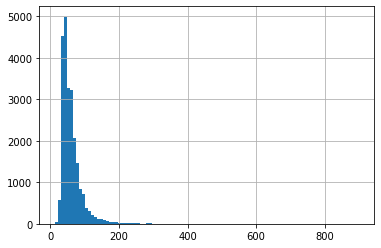

In [60]:
row_analyze(df.total_area)

В среднем квартиры имеют общую площадь 60 кв. м. Минимальная площадь составляет 14 кв. м., а максимальная 900 кв. м. Медианное значение равно 52 кв. м. 

count   23,508.0
mean        34.7
std         22.4
min          2.0
25%         19.0
50%         30.0
75%         42.2
max        409.7
Name: living_area, dtype: float64


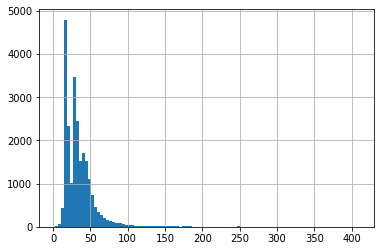

In [61]:
row_analyze(df.living_area)

В среднем квартиры имеют жилую площадь 34,7 кв. м. Минимальная площадь составляет 9 кв. м., а максимальная 409,7 кв. м. Медианное значение равно 30 кв. м.

count   23,487.0
mean        10.5
std          6.0
min          1.3
25%          7.0
50%          9.0
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64


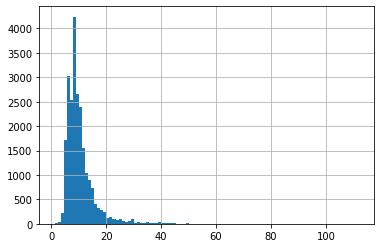

In [686]:
row_analyze(df.kitchen_area)

В среднем квартиры имеют площадь кухни 10,5 кв. м. Минимальная площадь составляет 1,3 кв. м., а максимальная 112 кв. м. Медианное значение равно 9 кв. м.

count        23,487.0
mean      6,553,032.4
std      10,912,836.8
min          12,190.0
25%       3,450,000.0
50%       4,650,000.0
75%       6,800,000.0
max     763,000,000.0
Name: last_price, dtype: float64


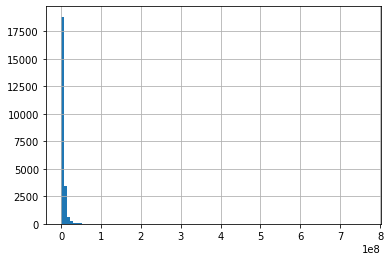

In [687]:
row_analyze(df.last_price)

Средняя цена квартиры в обьявлениях составила 6,5 млн. рублей. Максимальная цена достигает 763 млн. рублей. Минимальная около 12 млн. рублей. Медиана цены составляет 4,650 млн. рублей. 

count   23,487.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64


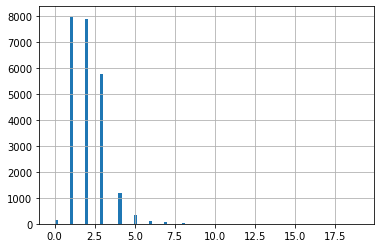

In [688]:
row_analyze(df.rooms)

Среднее значение и медиана количество комнат примерно равны и составляют 2 команты. Максимальное количество комнат - 19, а минимальное - 0, причем как было сказано выше, это квартиры-студии. 

count   23,487.0
mean         2.7
std          0.3
min          2.4
25%          2.6
50%          2.6
75%          2.7
max         22.6
Name: ceiling_height, dtype: float64


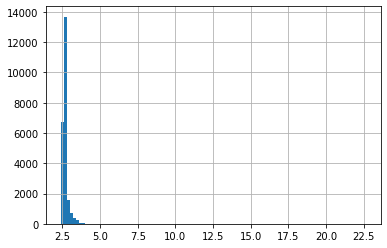

In [689]:
row_analyze(df.ceiling_height)

Средняя высота потолков составляет 2,7 м. Максимальная высота - 22,6 м,. минимальная - 2,4 м. Медиана выосты потолков составляет 2,6 м. 

count   23,487.0
mean         5.9
std          4.9
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64


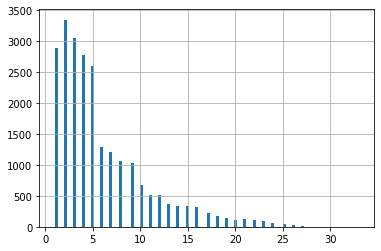

In [690]:
row_analyze(df.floor)

В среднем квартиры находятся на 6 этаже. Самая высокоэтажная квартира находится на 33 этаже, а на 1 этаже самая низкоэтажная. Медиана составляет 4 этажа. 

count      23487
unique         3
top       другой
freq       17271
Name: type_of_flat, dtype: object


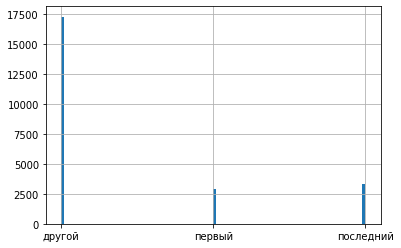

In [691]:
row_analyze(df.type_of_flat)

Чаще всего квартиры располагаются между первым и псоледним этажами. Реже всего на первом. На послднем этаже не намного больше квартир чем на первом. 

count   23,487.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         36.0
Name: floors_total, dtype: float64


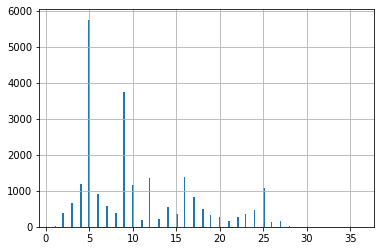

In [692]:
row_analyze(df.floors_total, 200)

В среднем дом, в котором. сдается квартира имеет 10 этажей. Максимальное количество этажей составляет 36, а минимальное - 1. Медиана составляет 9 этажей. 

count   18,031.0
mean    14,184.9
std      8,617.0
min        181.0
25%      9,233.0
50%     13,094.0
75%     16,285.0
max     65,968.0
Name: cityCenters_nearest, dtype: float64


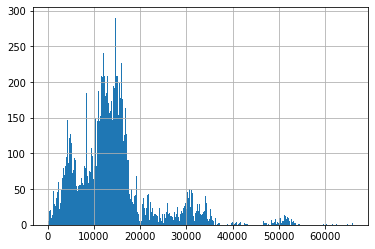

In [693]:
row_analyze(df.cityCenters_nearest, 500)

В среднем квартиры находятся в 14 км. от центра. Самая близкорасположенная квартира расположилась в 181 метре, а самая удаленная в 66 км. Медиана расстояния до центра составила 13 км. 

count   18,008.0
mean    28,801.9
std     12,626.5
min          0.0
25%     18,578.0
50%     26,752.0
75%     37,273.0
max     84,869.0
Name: airports_nearest, dtype: float64


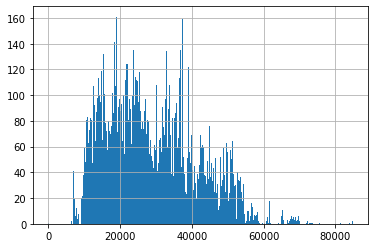

In [694]:
row_analyze(df.airports_nearest, 500)

В среднем расстояние до аэропорта составило 28,771 км. Максимальное растояние - 84,869 км. Минимальное составило 0, это где-то на Взлетной улице. Медиана составила 26,674 км. 

count   23,487.0
mean       167.2
std        306.3
min          0.0
25%          0.0
50%          0.0
75%        301.0
max      3,190.0
Name: parks_nearest, dtype: float64


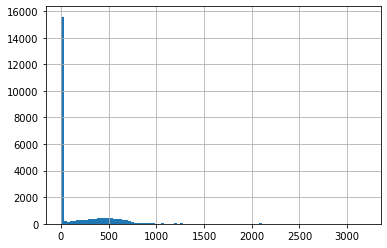

In [695]:
row_analyze(df.parks_nearest)

Можно сделать вывод, что чаще всего возле продаваемых квартир нет парков.

count   23,487.0
mean         2.6
std          1.8
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: day_of_publication, dtype: float64


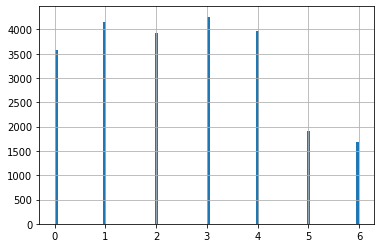

In [696]:
row_analyze(df.day_of_publication)

Можно сделать вывод, что чаще всего объявления дают по будням.

count   23,487.0
mean         6.4
std          3.5
min          1.0
25%          3.0
50%          6.0
75%         10.0
max         12.0
Name: month_of_publication, dtype: float64


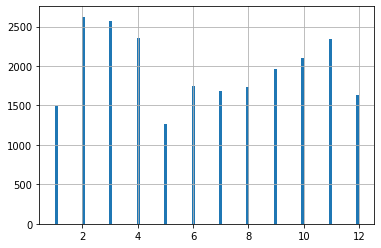

In [697]:
row_analyze(df.month_of_publication)

Чаще всего квартиры публикуют в феврале и марте, а реже - в мае.

#### Посмотрим, как быстро продавались квартиры 

count   20,323.0
mean       181.4
std        220.1
min          1.0
25%         45.0
50%         96.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64


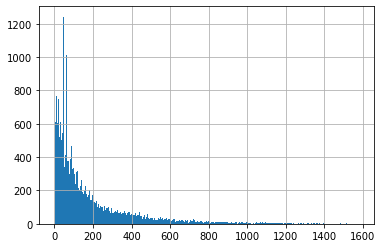

In [730]:
row_analyze(df.days_exposition, 300)

In [699]:
df.days_exposition.value_counts().head(10)

45.0    862
60.0    537
7.0     231
30.0    208
90.0    200
4.0     175
3.0     155
5.0     151
14.0    147
9.0     141
Name: days_exposition, dtype: int64

В среднем квартиры продавались за 185 дней, медианное значение составило 101 день. Есть квартиры, которые продавались за 1 день - это минимальный показатель. 1580 день понадобилось для продажи квартиры выставленной в 2014 году, это почти 4 с половиной года, а еще это максимальный период продажи. Квартиры, которые продавались меньше 44 дня можно считать быстропроданными, а больше 239 дней можно считать необычно долгим периодом продажи. 

Видно, что квартиры 'снимались' с публикации чаще всего на 45, 60, 7, 30 и 90 сутки. Возможно, это связано с политикой Яндекс Недвижимости и в те года обьявления снимались по истечению срока публикации. Сейчас такие нормативы работают везде по России, кроме Санкт-Петербурга и Москвы с их областями. Возможно раньше это работало и для них. Что касается 7 дней, это правдивая информация о сроке реализации квартиры. Посмотрим на сроки реализации без этих данных, но тут есть вероятность, что квартира продалась в этот период, а не была снята с публикации.

In [62]:
df.days_exposition.value_counts().head(10)

45.0    863
60.0    538
7.0     231
30.0    208
90.0    200
4.0     175
3.0     155
5.0     151
14.0    147
9.0     142
Name: days_exposition, dtype: int64

Для начала преобразуем данные в стобце days_exposition в int. Это нужно чтобы избежать проблемы с представлением чисел плавающей точкой.

In [63]:
df['days_exposition'] = df[df['days_exposition'].notna()]['days_exposition'].astype('int')

Далее соберем новый датасет.

In [64]:
good_data = df[~df['days_exposition'].isin([45, 60, 90])]
good_data.days_exposition.value_counts().head(10)

7.0     231
30.0    208
4.0     175
3.0     155
5.0     151
14.0    147
9.0     142
20.0    138
44.0    137
8.0     137
Name: days_exposition, dtype: int64

Обновленная информация:

count   18,741.0
mean       192.0
std        226.0
min          1.0
25%         41.0
50%        110.0
75%        253.0
max      1,580.0
Name: days_exposition, dtype: float64


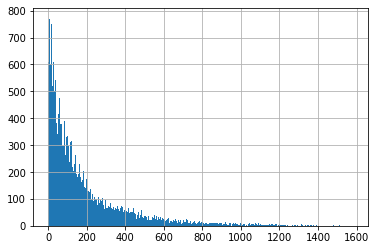

In [65]:
row_analyze(good_data.days_exposition, 300)

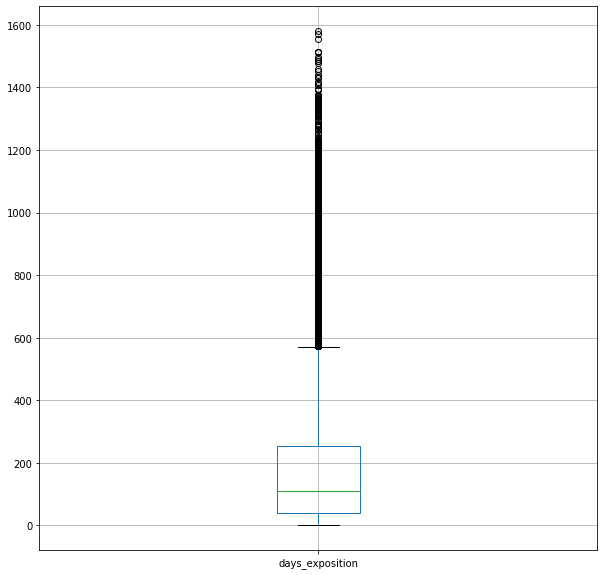

In [66]:
good_data.boxplot(column='days_exposition', figsize=(10, 10));

Если взглянуть на диаграмму рассеяния, можно понять, что значения выше 571 дня соответсвуют необычно долгим продажам. Так как нижний 'ус' диаграммы упирается в 1, то статистически быстрых продаж нет.

#### Посмотрим как зависит цена от следующих параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Коэффициент корреляции со столбцом total_area составляет 0.65
Коэффициент корреляции со столбцом living_area составляет 0.58
Коэффициент корреляции со столбцом kitchen_area составляет 0.51
Коэффициент корреляции со столбцом rooms составляет 0.36
Коэффициент корреляции со столбцом floor составляет 0.027
Коэффициент корреляции со столбцом day_of_publication составляет 0.0015
Коэффициент корреляции со столбцом month_of_publication составляет 0.0034
Коэффициент корреляции со столбцом year_of_publication составляет -0.043


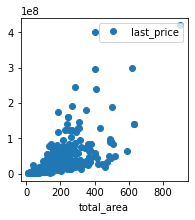

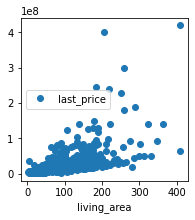

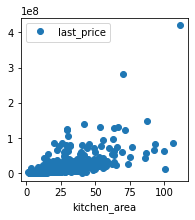

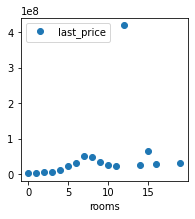

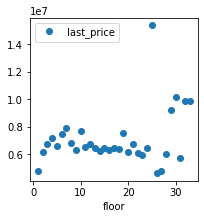

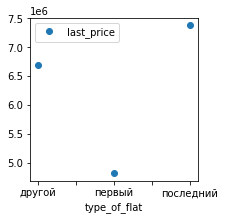

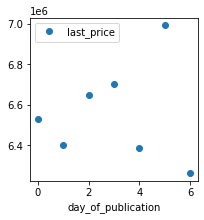

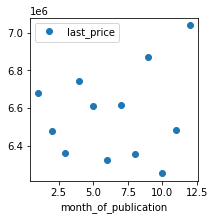

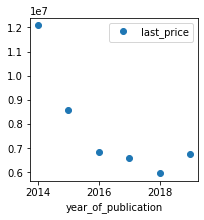

In [67]:
for column in ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 
               'type_of_flat', 'day_of_publication', 'month_of_publication', 'year_of_publication']:
    pivot = pd.pivot_table(
        df,
        index=column,
        values='last_price')
    pivot.plot(style='o', figsize=(3, 3))
    try:
        print(f'Коэффициент корреляции со столбцом {column} составляет {df["last_price"].corr(df.loc[:, column]):.2}')
    except:
        pass

- Выяснили, что цена объекта больше всего зависит от площади помещения (общей, жилой и площади кухни). Средняя положительная корреляция показывает на увеличение стоимости в зависимости от площади. 
- Линейной зависимости между ценой и днем, месяцем, и годом публикации не наблюдается. Но по графику можно отследить, что цены на квартиры с 2014 года падают, причем резкий обвал цен произошел в период с 2014 по 2015 год.
- Можно отметить, что кваритры на 1 этаже стоят дешевле остальных, а на последнем дороже. 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [68]:
pd.pivot_table(
    df,
    index='locality_name',
    values='one_square_price',
    aggfunc = ['count', 'median']).sort_values(by=('count', 'one_square_price'), ascending=False).head(10)

,count,median
,one_square_price,one_square_price
locality_name,,
Санкт-Петербург,15607,"104,750.0"
поселок Мурино,545,"85,680.5"
поселок Шушары,439,"76,829.3"
Всеволожск,397,"65,789.5"
Пушкин,366,"99,993.6"
Колпино,337,"74,725.3"
поселок Парголово,324,"91,780.2"
Гатчина,307,"67,796.6"


В Санкт-Петербурге больше всего объявлений о продаже.

#### Найдем 10 населенных пунктов с самым 'дешевым' квадратным метром жилья.

In [69]:
df.groupby('locality_name')['one_square_price'].agg('median').sort_values().head(10)

locality_name
деревня Старополье        11,000.0
поселок станции Свирь     11,481.5
деревня Вахнова Кара      11,688.3
деревня Выскатка          12,335.5
поселок Совхозный         12,629.1
деревня Малая Романовка   12,724.6
поселок Тёсово-4          12,931.0
деревня Сижно             13,709.7
деревня Ям-Тесово         13,711.6
поселок Житково           14,956.3
Name: one_square_price, dtype: float64

В деревне Старополье самый 'дешевый' квадратный метр жилья.

#### Найдем 10 населенных пунктов с самым 'дорогим' квадратным метром жилья.

In [70]:
df.groupby('locality_name')['one_square_price'].agg('median').sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург     104,750.0
Зеленогорск         101,666.7
Кудрово             100,000.0
Пушкин               99,993.6
Сестрорецк           99,678.5
поселок Левашово     96,997.7
поселок Парголово    91,780.2
деревня Кудрово      91,666.7
Мурино               91,478.4
деревня Мистолово    90,888.9
Name: one_square_price, dtype: float64

Видно, что в поселке Репино самый 'дорогой' квадртаный метр жилья. Оно и понятно - все хотят жить в Курортном районе)

#### Вычислим среднюю цену километра расстояния от центра города в Санкт-Петербурге
Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

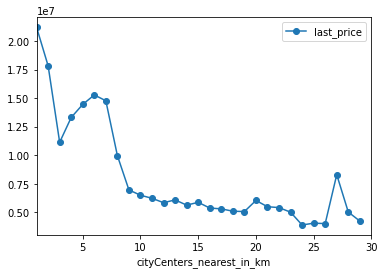

In [73]:
flats_in_spb = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_in_km != 0')
#flats_in_spb['one_km_price'] = flats_in_spb['last_price'] / flats_in_spb['cityCenters_nearest_in_km']
(flats_in_spb.
    groupby('cityCenters_nearest_in_km')['last_price'].
    mean().
    plot(legend=True, xlim=(1, 30), style='o-')
);

Можно заметить, что цена на квартиру сначала резко падает, что логично, но в диапазоне от 3 до 8 километров парадоксально растет. Непонятно, что считается центром, но возможно на расстоянии 8 километров от этой точки наодится Крестовский остров, поэтому происходит рост, дальше опять идет спад и в районе 27 км. опять рост цен - возможно там тоже расположен зажиточный район.

### Общий вывод

Так как главной задачей стоит определение рыночной стоимости объектов недвижимости, то необходимо получить модель для анализа цены в зависимости от параметров объекта. Ранее было изучено как цена зависит от следующих параметров:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год). 
 
 Сведем все эти данные в одну итоговую таблицу.

In [74]:
final_pivot = pd.pivot_table(
    df,
    index=['total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest','one_square_price','type_of_flat', 'cityCenters_nearest_in_km',
       'is_apartment', 'studio', 'open_plan'],
    values='last_price')
final_pivot = final_pivot.reset_index(drop= False)
final_pivot

,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,...,parks_nearest,ponds_around3000,ponds_nearest,one_square_price,type_of_flat,cityCenters_nearest_in_km,is_apartment,studio,open_plan,last_price
0,12.0,1,2.5,5,10.0,2,2.1,0,Санкт-Петербург,"21,314.0",...,886.0,2,45.0,"200,000.0",другой,1.0,False,False,False,"2,400,000.0"
1,13.0,1,2.6,9,7.5,1,2.3,0,Санкт-Петербург,"14,350.0",...,0.0,1,185.0,"107,692.3",первый,16.0,False,False,False,"1,400,000.0"
2,13.0,1,2.6,5,10.0,3,2.3,0,Санкт-Петербург,"21,302.0",...,592.0,3,27.0,"292,307.7",другой,1.0,False,False,False,"3,800,000.0"
3,13.0,1,3.4,5,7.5,2,2.3,0,Санкт-Петербург,"24,915.0",...,644.0,0,0.0,"142,307.7",другой,5.0,False,False,False,"1,850,000.0"
4,13.2,1,2.6,5,7.6,1,2.3,0,Санкт-Петербург,"19,891.0",...,361.0,1,155.0,"127,727.3",первый,4.0,False,False,False,"1,686,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,590.0,15,3.5,6,409.0,3,100.0,0,Санкт-Петербург,"24,447.0",...,767.0,0,0.0,"110,169.5",другой,5.0,False,False,False,"65,000,000.0"
17982,618.0,7,3.4,7,258.0,5,70.0,0,Санкт-Петербург,"32,440.0",...,0.0,2,198.0,"485,436.9",другой,5.0,False,False,False,"300,000,000.0"
17983,631.0,7,2.6,5,364.0,5,60.0,0,Санкт-Петербург,"25,707.0",...,0.0,2,210.0,"221,870.0",последний,5.0,False,False,False,"140,000,000.0"
17984,631.2,7,3.9,4,322.3,4,19.5,1,Санкт-Петербург,"25,707.0",...,0.0,2,210.0,"221,799.7",последний,5.0,False,False,False,"140,000,000.0"


Таким образом мы получили таблицу для анализа стоимости квартиры в зависимости от наиболее значимых параметров.